Q3. Form Parts of Speech (POS) taggers & Syntactic Analysers (12 marks) - JJ
1.	Demonstrate POS tagging using NLTK POS tagger, textblob POS tagger and the Regular Expression tagger and report the output. (5 marks)
2.	Explain the differences of the POS taggers using the output obtained in the above question. (2 marks)
3.	Draw possible parse trees for the given sentence using suitable python codes and report the output along with the code. (5 marks)


In [6]:
# 1. Demonstrate POS tagging using NLTK POS tagger, textblob POS tagger and the Regular Expression tagger and report the output. (5 marks)

# Import necessary library
from nltk import pos_tag, RegexpTagger, word_tokenize
from textblob import TextBlob


# read data from text file
with open('Assignment Data/Data_2.txt', 'r') as file:
    line = file.read()

# NLTK POS tagging
nltk_tag = pos_tag(word_tokenize(line))

# TextBlob POS tagging
tb_tag = TextBlob(line).tags

# Define Regular Expression tags
patterns = [
    (r'.*ed$', 'VBD'), # past tense verb
    (r'.*es$', 'VBZ'), # present tense verb
    (r'.*ing$', 'VBG'), # gerund
    (r'.*ly$', 'RB'), # adverb
    (r'.*s$', 'NNS'), # plural noun
    (r'.*ful$', 'JJ'), # adjective
    (r'.*', 'NN') # default noun
]

regex_tagger = RegexpTagger(patterns)
regex_tags = regex_tagger.tag(word_tokenize(line))

# Print the results
print("NLTK POS tagging:")
print(nltk_tag)

print("\nTextBlob POS tagging:")
print(tb_tag)

print("\nRegular Expression tagging:")
print(regex_tags)

NLTK POS tagging:
[('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC'), ('chased', 'VBD'), ('away', 'RB'), ('.', '.')]

TextBlob POS tagging:
[('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC'), ('chased', 'VBD'), ('away', 'RB')]

Regular Expression tagging:
[('The', 'NN'), ('big', 'NN'), ('black', 'NN'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'NN'), ('the', 'NN'), ('white', 'NN'), ('cat', 'NN'), ('and', 'NN'), ('chased', 'VBD'), ('away', 'NN'), ('.', 'NN')]


['The', 'big', 'black', 'dog', 'barked', 'at', 'the', 'white', 'cat', 'and', 'chased', 'away']



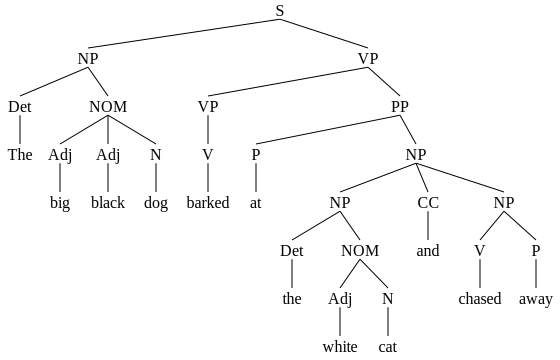

(S
  (NP (Det The) (NOM (Adj big) (Adj black) (N dog)))
  (VP
    (VP (V barked))
    (PP
      (P at)
      (NP
        (NP (Det the) (NOM (Adj white) (N cat)))
        (CC and)
        (NP (V chased) (P away))))))


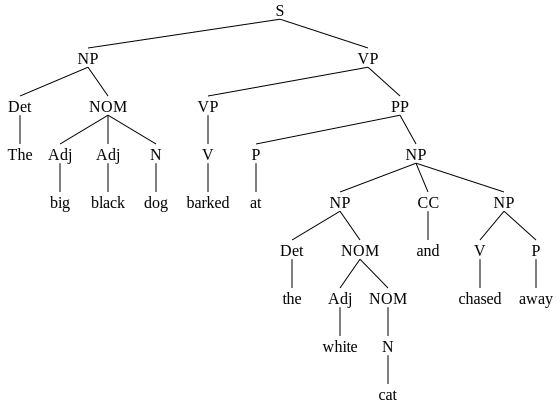

(S
  (NP (Det The) (NOM (Adj big) (Adj black) (N dog)))
  (VP
    (VP (V barked))
    (PP
      (P at)
      (NP
        (NP (Det the) (NOM (Adj white) (NOM (N cat))))
        (CC and)
        (NP (V chased) (P away))))))


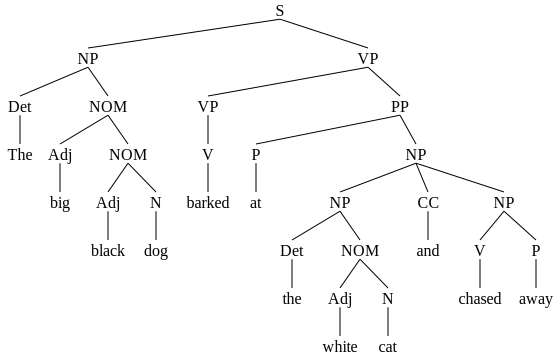

(S
  (NP (Det The) (NOM (Adj big) (NOM (Adj black) (N dog))))
  (VP
    (VP (V barked))
    (PP
      (P at)
      (NP
        (NP (Det the) (NOM (Adj white) (N cat)))
        (CC and)
        (NP (V chased) (P away))))))


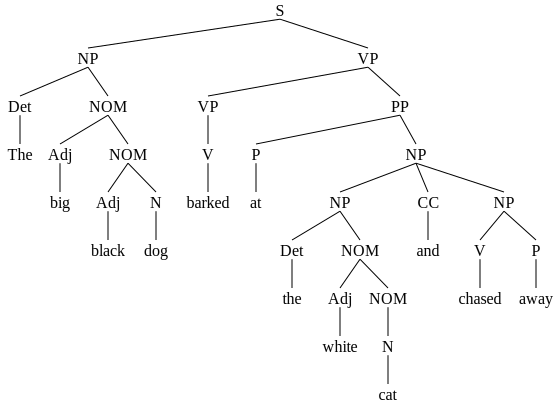

(S
  (NP (Det The) (NOM (Adj big) (NOM (Adj black) (N dog))))
  (VP
    (VP (V barked))
    (PP
      (P at)
      (NP
        (NP (Det the) (NOM (Adj white) (NOM (N cat))))
        (CC and)
        (NP (V chased) (P away))))))


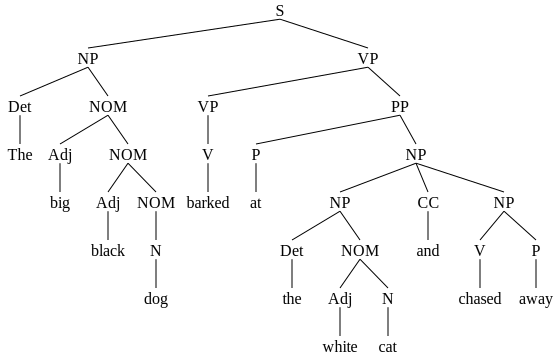

(S
  (NP (Det The) (NOM (Adj big) (NOM (Adj black) (NOM (N dog)))))
  (VP
    (VP (V barked))
    (PP
      (P at)
      (NP
        (NP (Det the) (NOM (Adj white) (N cat)))
        (CC and)
        (NP (V chased) (P away))))))


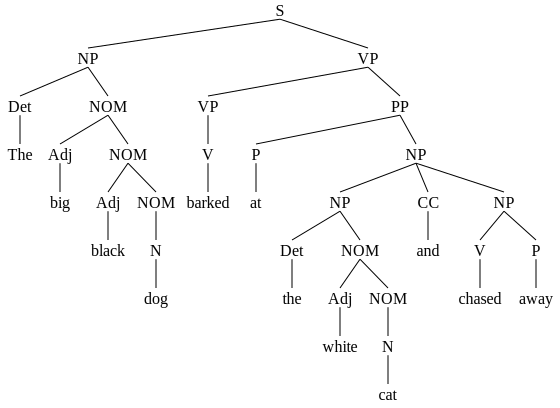

(S
  (NP (Det The) (NOM (Adj big) (NOM (Adj black) (NOM (N dog)))))
  (VP
    (VP (V barked))
    (PP
      (P at)
      (NP
        (NP (Det the) (NOM (Adj white) (NOM (N cat))))
        (CC and)
        (NP (V chased) (P away))))))


In [6]:
# 3.Draw possible parse trees for the given sentence using suitable python codes and report the output along with the code. (5 marks)
import nltk

sentence = "The big black dog barked at the white cat and chased away"

text2 = nltk.CFG.fromstring("""
S -> NP VP | S CC S
NP -> Det NOM | Det N | NP CC NP | N | V P | PP NP | Det N PP
NOM -> Adj NOM | Adj N | Adj Adj N | N
VP -> V NP | VP PP | V | V NP PP | VP CC VP | Adj VP | VP Adj | V Adj
PP -> P NP
V -> 'barked' | 'chased'
Det -> 'the' | 'The'
CC -> 'and'
N -> 'dog' | 'cat' | N CC N
Adj -> 'big' | 'black' | 'white'
P -> 'at' | 'away'
""" )
text1 = nltk.tokenize.word_tokenize(sentence)
print(text1)
print()
parser = nltk.ChartParser(text2)
for tree in parser.parse(text1):
    display(tree)
    print(tree)